In [1]:
# coding: utf-8

import requests
from bs4 import BeautifulSoup
import csv
r=requests.get('https://movie.douban.com/top250')
mypage= r.text

page_next=[]
url = 'https://movie.douban.com/top250'
for q in [-25,0,25,50,75,100,125,150,175,200,225]:
    page_number=str(q + 25)
    url_next=url+ "?start=" + page_number + '&filter='
    page_next.append(url_next)

cn_name = []
en_name = []
comment_number = []
rating = []

data = []

actors = []
year = []
area= []
types = []
genre = []
location = []
director  = []

for page in page_next:
    l1 = requests.get(page).text
    mypage = BeautifulSoup(l1,'html.parser')
    mylis = mypage.find('ol', attrs={'class': 'grid_view'}).find_all('li')

    for li in mylis:
        myspans = li.find('div', attrs={'class': 'hd'}).find_all('span')
        cn_name.append(myspans[0].text)
        en_name.append(myspans[1].text[3:])
        comment_number.append(li.find('div', attrs={'class': 'star'}).find_all('span')[3].text[:-3])
        rating.append(li.find('span', attrs={'class': 'rating_num'}).text)
        directors = li.find('p').text.strip()
        
        staff = directors.replace(u'\xa0', u' ')
        idx_director = staff.find('导演:')
        idx_actors = staff.find('主')
        if len(staff[idx_director:idx_actors]) < 61:
            director.append(staff[idx_director:idx_actors])
        else:
            director.append(staff[idx_director:62])
        parts = staff.split('/')
        year.append(parts[-3].split()[-1])
        area.append(parts[-2])
        types.append(parts[-1])


        # idx = director.find('主演')
        # directors.append(director[:idx])
        # actors.append(director[idx:])

        # d = [i.strip() for i in director[idx:].split('/')]
    # print(staff)
        # genre.append(d[-1])
        # location.append(d[-2]) 

# print (directors#data.append([cn_name, en_name,  rating, comment_number , director])





with open('data_new.csv','w') as f:
     writers = csv.writer(f)
     header = ['cn_name','alias','rating' , 'comment_number' , 'director','year','area','types']
     writers.writerow(header)
     writers.writerows(zip(cn_name,en_name,rating,comment_number,director,year,area,types))
#      writers.writerow(year)
#      writers.writerow(rating)
#      writers.writerow(types)

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
df = pd.read_csv('data_new.csv')
df

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,988856,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,718351,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
2,这个杀手不太冷,Léon,9.4,932418,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
3,阿甘正传,Forrest Gump,9.4,792958,导演: Robert Zemeckis,1994,美国,剧情 爱情
4,美丽人生,La vita è bella,9.5,463283,导演: 罗伯托·贝尼尼 Roberto Benigni,1997,意大利,剧情 喜剧 爱情 战争
5,千与千寻,千と千尋の神隠し,9.2,741794,导演: 宫崎骏 Hayao Miyazaki,2001,日本,剧情 动画 奇幻
6,泰坦尼克号,Titanic,9.2,732447,导演: 詹姆斯·卡梅隆 James Cameron,1997,美国,剧情 爱情 灾难
7,辛德勒的名单,Schindler's List,9.4,422300,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
8,盗梦空间,Inception,9.3,834715,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
9,机器人总动员,WALL·E,9.3,547345,导演: 安德鲁·斯坦顿 Andrew Stanton,2008,美国,爱情 科幻 动画 冒险


In [4]:
def cleaning(x):
    if x in ['2004(中国大陆)']:
        return False
    else:
        return True
df[df['year'].apply(cleaning)]['year'].value_counts()

2004    13
2010    13
2001    12
2009    11
1994    11
2011    10
2008    10
2013    10
2002     9
2014     9
1997     9
2006     9
2003     8
1999     8
1995     8
1993     7
2000     7
2007     7
2016     6
1988     5
2015     5
1998     5
2012     5
1996     5
1991     5
2005     4
1987     3
1990     3
1957     2
1986     2
1989     2
1984     2
1992     2
1953     2
1966     2
1936     1
1942     1
1971     1
1950     1
1980     1
1954     1
1982     1
1979     1
2017     1
1952     1
1931     1
1972     1
1974     1
1960     1
1975     1
1939     1
1965     1
1940     1
Name: year, dtype: int64

In [5]:
df['rating'].mean()

8.782399999999999

In [6]:
df['rating'].min()

8.3

In [7]:
df['rating'].max()

9.6

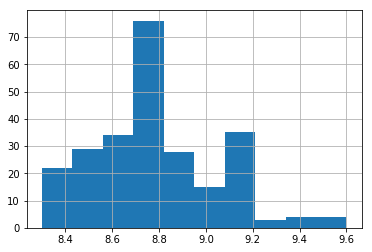

In [67]:
df['rating'].hist(bins=10)

In [9]:
from matplotlib import pyplot as plt

In [10]:
df.sort_values(by='rating', ascending=False).head(10)

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,988856,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
41,控方证人,Witness for the Prosecution,9.6,105954,导演: 比利·怀尔德 Billy Wilder,1957,美国,剧情 犯罪 悬疑
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,718351,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
4,美丽人生,La vita è bella,9.5,463283,导演: 罗伯托·贝尼尼 Roberto Benigni,1997,意大利,剧情 喜剧 爱情 战争
7,辛德勒的名单,Schindler's List,9.4,422300,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
26,十二怒汉,12 Angry Men,9.4,186840,导演: Sidney Lumet,1957,美国,剧情
3,阿甘正传,Forrest Gump,9.4,792958,导演: Robert Zemeckis,1994,美国,剧情 爱情
2,这个杀手不太冷,Léon,9.4,932418,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
8,盗梦空间,Inception,9.3,834715,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
9,机器人总动员,WALL·E,9.3,547345,导演: 安德鲁·斯坦顿 Andrew Stanton,2008,美国,爱情 科幻 动画 冒险


In [70]:
df9= df.sort_values(by='comment_number', ascending=False).head(100)
df9

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,988856,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
2,这个杀手不太冷,Léon,9.4,932418,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
8,盗梦空间,Inception,9.3,834715,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
3,阿甘正传,Forrest Gump,9.4,792958,导演: Robert Zemeckis,1994,美国,剧情 爱情
11,三傻大闹宝莱坞,3 Idiots,9.2,748206,导演: 拉库马·希拉尼 Rajkumar Hirani,2009,印度,剧情 喜剧 爱情 歌舞
5,千与千寻,千と千尋の神隠し,9.2,741794,导演: 宫崎骏 Hayao Miyazaki,2001,日本,剧情 动画 奇幻
6,泰坦尼克号,Titanic,9.2,732447,导演: 詹姆斯·卡梅隆 James Cameron,1997,美国,剧情 爱情 灾难
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,718351,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
77,让子弹飞,让子弹飞一会儿 / 火烧云,8.7,662582,导演: 姜文 Wen Jiang,2010,中国大陆 香港,剧情 喜剧 动作 西部
10,海上钢琴师,La leggenda del pianista sull'oceano,9.2,645345,导演: 朱塞佩·托纳多雷 Giuseppe Tornatore,1998,意大利,剧情 音乐


In [71]:
df9[df9['rating'] > 9.0].sort_values(by='comment_number', ascending=True)

,cn_name,alias,rating,comment_number,director,year,area,types
39,两杆大烟枪,"Lock, Stock and Two Smoking Barrels",9.1,291766,导演: Guy Ritchie,1998,英国,剧情 喜剧 犯罪
19,乱世佳人,Gone with the Wind,9.2,293599,导演: 维克多·弗莱明 Victor Fleming / 乔治·库克 George Cuko...,1939,美国,剧情 历史 爱情 战争
32,活着,人生 / Lifetimes,9.1,298028,导演: 张艺谋 Yimou Zhang,1994,中国大陆 香港,剧情 历史 家庭
18,熔炉,도가니,9.2,299136,导演: 黄东赫 Dong-hyuk Hwang,2011,韩国,剧情
29,指环王3：王者无敌,The Lord of the Rings: The Return of the King,9.1,308464,导演: 彼得·杰克逊 Peter Jackson,2003,美国 新西兰,剧情 动作 奇幻 冒险
24,天堂电影院,Nuovo Cinema Paradiso,9.1,332343,导演: 朱塞佩·托纳多雷 Giuseppe Tornatore,1988,意大利 法国,剧情 爱情
15,教父,The Godfather,9.2,376533,导演: 弗朗西斯·福特·科波拉 Francis Ford Coppola,1972,美国,剧情 犯罪
21,触不可及,Intouchables,9.1,404734,导演: 奥利维·那卡什 Olivier Nakache / 艾力克·托兰达 Eric Tol...,2011,法国,剧情 喜剧
7,辛德勒的名单,Schindler's List,9.4,422300,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
16,龙猫,となりのトトロ,9.1,461754,导演: 宫崎骏 Hayao Miyazaki,1988,日本,儿童 动画 奇幻 家庭


In [15]:
df['director'].value_counts()

导演: 宫崎骏 Hayao Miyazaki                                             7
导演: 克里斯托弗·诺兰 Christopher Nolan                                     7
导演: 王家卫 Kar Wai Wong                                               5
导演: 史蒂文·斯皮尔伯格 Steven Spielberg                                     5
导演: 大卫·芬奇 David Fincher                                            4
导演: 李安 Ang Lee                                                     4
导演: 理查德·柯蒂斯 Richard Curtis                                         3
导演: 姜文 Wen Jiang                                                   3
导演: 朱塞佩·托纳多雷 Giuseppe Tornatore                                    3
导演: 彼得·杰克逊 Peter Jackson                                           3
导演: 刘镇伟 Jeffrey Lau                                                3
导演: 弗朗西斯·福特·科波拉 Francis Ford Coppola                               3
导演: 詹姆斯·卡梅隆 James Cameron                                          3
导演: 理查德·林克莱特 Richard Linklater                                     3
导演: 吴宇森 John Woo                  

In [68]:
df［df［'rating'>9.0］.sort_values(by='commt_number', ascending=true)

SyntaxError: invalid character in identifier (<ipython-input-68-aa0b085241d8>, line 1)

In [16]:
def is_select(x):
    return x.find('爱情') != -1 
dftyl = df[df['types'].apply(is_select)]
dftyl

,cn_name,alias,rating,comment_number,director,year,area,types
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,718351,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
3,阿甘正传,Forrest Gump,9.4,792958,导演: Robert Zemeckis,1994,美国,剧情 爱情
4,美丽人生,La vita è bella,9.5,463283,导演: 罗伯托·贝尼尼 Roberto Benigni,1997,意大利,剧情 喜剧 爱情 战争
6,泰坦尼克号,Titanic,9.2,732447,导演: 詹姆斯·卡梅隆 James Cameron,1997,美国,剧情 爱情 灾难
9,机器人总动员,WALL·E,9.3,547345,导演: 安德鲁·斯坦顿 Andrew Stanton,2008,美国,爱情 科幻 动画 冒险
11,三傻大闹宝莱坞,3 Idiots,9.2,748206,导演: 拉库马·希拉尼 Rajkumar Hirani,2009,印度,剧情 喜剧 爱情 歌舞
14,大话西游之大圣娶亲,西遊記大結局之仙履奇緣,9.2,546039,导演: 刘镇伟 Jeffrey Lau,1995,香港 中国大陆,喜剧 爱情 奇幻 冒险
19,乱世佳人,Gone with the Wind,9.2,293599,导演: 维克多·弗莱明 Victor Fleming / 乔治·库克 George Cuko...,1939,美国,剧情 历史 爱情 战争
24,天堂电影院,Nuovo Cinema Paradiso,9.1,332343,导演: 朱塞佩·托纳多雷 Giuseppe Tornatore,1988,意大利 法国,剧情 爱情
25,怦然心动,Flipped,8.9,615340,导演: 罗伯·莱纳 Rob Reiner,2010,美国,剧情 喜剧 爱情


In [17]:
len(dftyl)

63

In [18]:
def is_select(x):
    return x.find('喜剧') != -1 
dftyc = df[df['types'].apply(is_select)]
dftyc

,cn_name,alias,rating,comment_number,director,year,area,types
4,美丽人生,La vita è bella,9.5,463283,导演: 罗伯托·贝尼尼 Roberto Benigni,1997,意大利,剧情 喜剧 爱情 战争
11,三傻大闹宝莱坞,3 Idiots,9.2,748206,导演: 拉库马·希拉尼 Rajkumar Hirani,2009,印度,剧情 喜剧 爱情 歌舞
14,大话西游之大圣娶亲,西遊記大結局之仙履奇緣,9.2,546039,导演: 刘镇伟 Jeffrey Lau,1995,香港 中国大陆,喜剧 爱情 奇幻 冒险
21,触不可及,Intouchables,9.1,404734,导演: 奥利维·那卡什 Olivier Nakache / 艾力克·托兰达 Eric Tol...,2011,法国,剧情 喜剧
25,怦然心动,Flipped,8.9,615340,导演: 罗伯·莱纳 Rob Reiner,2010,美国,剧情 喜剧 爱情
34,罗马假日,Roman Holiday,8.9,417704,导演: 威廉·惠勒 William Wyler,1953,美国,喜剧 剧情 爱情
35,大话西游之月光宝盒,西遊記第壹佰零壹回之月光寶盒,8.9,439828,导演: 刘镇伟 Jeffrey Lau,1995,香港 中国大陆,喜剧 爱情 奇幻 冒险
36,飞屋环游记,Up,8.9,542706,导演: 彼特·道格特 Pete Docter / 鲍勃·彼德森 Bob Peterson,2009,美国,剧情 喜剧 动画 冒险
37,疯狂动物城,Zootopia,9.2,565471,导演: 拜伦·霍华德 Byron Howard / 瑞奇·摩尔 Rich Moore,2016,美国,喜剧 动画 冒险
39,两杆大烟枪,"Lock, Stock and Two Smoking Barrels",9.1,291766,导演: Guy Ritchie,1998,英国,剧情 喜剧 犯罪


In [19]:
len(dftyc)

45

In [21]:
def is_select(x):
    return x.find('犯罪') != -1 
dftycr = df[df['types'].apply(is_select)]
dftycr

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,988856,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
2,这个杀手不太冷,Léon,9.4,932418,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
15,教父,The Godfather,9.2,376533,导演: 弗朗西斯·福特·科波拉 Francis Ford Coppola,1972,美国,剧情 犯罪
22,无间道,無間道,9.0,445844,导演: 刘伟强 / 麦兆辉,2002,香港,剧情 犯罪 悬疑
31,蝙蝠侠：黑暗骑士,The Dark Knight,9.0,357157,导演: 克里斯托弗·诺兰 Christopher Nolan,2008,美国 英国,剧情 动作 科幻 犯罪 惊悚
39,两杆大烟枪,"Lock, Stock and Two Smoking Barrels",9.1,291766,导演: Guy Ritchie,1998,英国,剧情 喜剧 犯罪
41,控方证人,Witness for the Prosecution,9.6,105954,导演: 比利·怀尔德 Billy Wilder,1957,美国,剧情 犯罪 悬疑
48,教父2,The Godfather: Part Ⅱ,9.1,202869,导演: 弗朗西斯·福特·科波拉 Francis Ford Coppola,1974,美国,剧情 犯罪
54,美国往事,Once Upon a Time in America,9.1,187821,导演: 赛尔乔·莱翁内 Sergio Leone,1984,意大利 美国,犯罪 剧情
58,七宗罪,Se7en,8.7,461422,导演: 大卫·芬奇 David Fincher,1995,美国,剧情 犯罪 悬疑 惊悚


In [23]:
len(dftycr)

45

In [24]:
def is_select(x):
    return x.find('印度') != -1 
df4 = df[df['area'].apply(is_select)]
df4

,cn_name,alias,rating,comment_number,director,year,area,types
11,三傻大闹宝莱坞,3 Idiots,9.2,748206,导演: 拉库马·希拉尼 Rajkumar Hirani,2009,印度,剧情 喜剧 爱情 歌舞
63,摔跤吧！爸爸,Dangal,9.1,495927,导演: 涅提·蒂瓦里 Nitesh Tiwari,2016,印度,剧情 传记 运动 家庭
177,地球上的星星,Taare Zameen Par,8.8,87784,导演: 阿米尔·汗 Aamir Khan,2007,印度,剧情 儿童 家庭


In [25]:
from matplotlib import pyplot as plt

In [29]:
df.sort_values(by='rating', ascending=False)

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,988856,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
41,控方证人,Witness for the Prosecution,9.6,105954,导演: 比利·怀尔德 Billy Wilder,1957,美国,剧情 犯罪 悬疑
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,718351,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
4,美丽人生,La vita è bella,9.5,463283,导演: 罗伯托·贝尼尼 Roberto Benigni,1997,意大利,剧情 喜剧 爱情 战争
7,辛德勒的名单,Schindler's List,9.4,422300,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
26,十二怒汉,12 Angry Men,9.4,186840,导演: Sidney Lumet,1957,美国,剧情
3,阿甘正传,Forrest Gump,9.4,792958,导演: Robert Zemeckis,1994,美国,剧情 爱情
2,这个杀手不太冷,Léon,9.4,932418,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
8,盗梦空间,Inception,9.3,834715,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
9,机器人总动员,WALL·E,9.3,547345,导演: 安德鲁·斯坦顿 Andrew Stanton,2008,美国,爱情 科幻 动画 冒险


In [32]:
s_year = df['year'].value_counts()

In [35]:
s_year= s_year.sort_index()

([<matplotlib.axis.XTick at 0x10caf6518>,
 <a list of 7 Text xticklabel objects>)

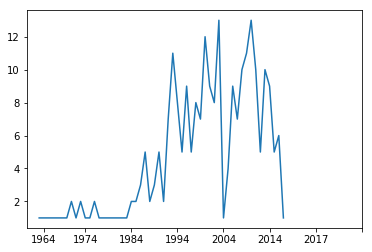

In [37]:
plt.plot(s_year.index, s_year.values)
plt.xticks([1, 10, 20, 30, 40, 50, 60,70],['1964','1974','1984','1994','2004','2014','2017'])

In [39]:
df['area'].value_counts()

 美国                   85
 日本                   30
 香港                   13
 美国 英国                10
 韩国                    9
 美国 德国                 7
 中国大陆 香港               6
 中国大陆                  5
 英国                    5
 美国 法国                 4
 英国 美国                 4
 美国 加拿大                4
 香港 中国大陆               4
 美国 澳大利亚               3
 印度                    3
 台湾 美国                 2
 德国                    2
 美国 新西兰                2
 意大利                   2
 法国                    2
 美国 德国 英国              2
 意大利 美国                2
 美国 奥地利 瑞士             1
 泰国                    1
 法国 瑞士 德国              1
 香港 日本 韩国              1
 法国 英国                 1
 法国 德国                 1
 英国 澳大利亚               1
 博茨瓦纳 南非               1
                      ..
 德国 美国                 1
 法国 英国 美国              1
 爱尔兰 加拿大 英国 美国         1
 美国 英国 德国              1
 美国 德国 捷克              1
 西班牙                   1
 台湾 日本                 1
 德国 法国 西班牙 美国          1
 美国 台湾 英国 加拿大          1


In [38]:
def is_select(x):
    return x.find('美国') != -1 
df1 = df[df['area'].apply(is_select)]
df1

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,988856,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
3,阿甘正传,Forrest Gump,9.4,792958,导演: Robert Zemeckis,1994,美国,剧情 爱情
6,泰坦尼克号,Titanic,9.2,732447,导演: 詹姆斯·卡梅隆 James Cameron,1997,美国,剧情 爱情 灾难
7,辛德勒的名单,Schindler's List,9.4,422300,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
8,盗梦空间,Inception,9.3,834715,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
9,机器人总动员,WALL·E,9.3,547345,导演: 安德鲁·斯坦顿 Andrew Stanton,2008,美国,爱情 科幻 动画 冒险
12,忠犬八公的故事,Hachi: A Dog's Tale,9.2,514134,导演: 莱塞·霍尔斯道姆 Lasse Hallström,2009,美国 英国,剧情
15,教父,The Godfather,9.2,376533,导演: 弗朗西斯·福特·科波拉 Francis Ford Coppola,1972,美国,剧情 犯罪
17,楚门的世界,The Truman Show,9.1,515863,导演: 彼得·威尔 Peter Weir,1998,美国,剧情 科幻
19,乱世佳人,Gone with the Wind,9.2,293599,导演: 维克多·弗莱明 Victor Fleming / 乔治·库克 George Cuko...,1939,美国,剧情 历史 爱情 战争


In [42]:
s_year1 = df1['year'].value_counts()

In [43]:
s_year1= s_year1.sort_index()

([<matplotlib.axis.XTick at 0x10c44be10>,
 <a list of 6 Text xticklabel objects>)

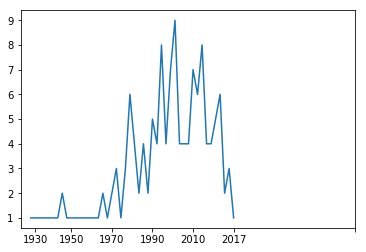

In [46]:
plt.plot(s_year1.index, s_year1.values)
plt.xticks([1, 9, 18, 27, 36 ,45 ,72],['1930','1950','1970','1990','2010','2017'])

In [53]:
def is_select(x):
    return x.find('香港') != -1 
df2 = df[df['area'].apply(is_select)]
df2

,cn_name,alias,rating,comment_number,director,year,area,types
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,718351,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
14,大话西游之大圣娶亲,西遊記大結局之仙履奇緣,9.2,546039,导演: 刘镇伟 Jeffrey Lau,1995,香港 中国大陆,喜剧 爱情 奇幻 冒险
22,无间道,無間道,9.0,445844,导演: 刘伟强 / 麦兆辉,2002,香港,剧情 犯罪 悬疑
32,活着,人生 / Lifetimes,9.1,298028,导演: 张艺谋 Yimou Zhang,1994,中国大陆 香港,剧情 历史 家庭
35,大话西游之月光宝盒,西遊記第壹佰零壹回之月光寶盒,8.9,439828,导演: 刘镇伟 Jeffrey Lau,1995,香港 中国大陆,喜剧 爱情 奇幻 冒险
77,让子弹飞,让子弹飞一会儿 / 火烧云,8.7,662582,导演: 姜文 Wen Jiang,2010,中国大陆 香港,剧情 喜剧 动作 西部
78,春光乍泄,春光乍洩,8.8,263608,导演: 王家卫 Kar Wai Wong,1997,香港 日本 韩国,剧情 爱情 同性
82,阳光灿烂的日子,In the Heat of the Sun,8.8,286929,导演: 姜文 Wen Jiang,1994,中国大陆 香港,剧情
85,重庆森林,重慶森林,8.7,351108,导演: 王家卫 Kar Wai Wong,1994,香港,剧情 爱情
90,射雕英雄传之东成西就,射鵰英雄傳之東成西就,8.7,291094,导演: 刘镇伟 Jeffrey Lau,1993,香港,喜剧 古装


In [54]:
s_year2 = df2['year'].value_counts()

In [55]:
s_year2= s_year2.sort_index()

([<matplotlib.axis.XTick at 0x10cc59d30>,
 <a list of 5 Text xticklabel objects>)

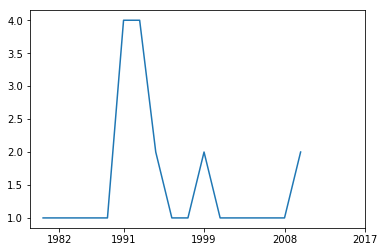

In [58]:
plt.plot(s_year2.index, s_year2.values)
plt.xticks( [1,5,10,15,20],['1982','1991','1999','2008','2017'])

In [63]:
def is_select(x):
    return x.find('日本') != -1 
df3 = df[df['area'].apply(is_select)]
df3

,cn_name,alias,rating,comment_number,director,year,area,types
5,千与千寻,千と千尋の神隠し,9.2,741794,导演: 宫崎骏 Hayao Miyazaki,2001,日本,剧情 动画 奇幻
16,龙猫,となりのトトロ,9.1,461754,导演: 宫崎骏 Hayao Miyazaki,1988,日本,儿童 动画 奇幻 家庭
33,天空之城,天空の城ラピュタ,9.0,361772,导演: 宫崎骏 Hayao Miyazaki,1986,日本,动画 奇幻 冒险
44,哈尔的移动城堡,ハウルの動く城,8.9,383484,导演: 宫崎骏 Hayao Miyazaki,2004,日本,爱情 动画 奇幻 冒险
52,情书,Love Letter,8.8,403328,导演: 岩井俊二 Shunji Iwai,1995,日本,剧情 爱情
59,被嫌弃的松子的一生,嫌われ松子の一生,8.9,312195,导演: 中岛哲也 Tetsuya Nakashima,2006,日本,剧情 歌舞
74,入殓师,おくりびと,8.8,333527,导演: 泷田洋二郎 Yôjirô Takita,2008,日本,剧情
78,春光乍泄,春光乍洩,8.8,263608,导演: 王家卫 Kar Wai Wong,1997,香港 日本 韩国,剧情 爱情 同性
81,幽灵公主,もののけ姫,8.8,249500,导演: 宫崎骏 Hayao Miyazaki,1997,日本,动作 爱情 战争 动画 奇幻 冒险
94,一一,Yi yi / Yi yi: A One and a Two,8.9,164108,导演: 杨德昌 Edward Yang,2000,台湾 日本,剧情 爱情 家庭


In [64]:
s_year3 = df3['year'].value_counts()

In [65]:
s_year3= s_year3.sort_index()

([<matplotlib.axis.XTick at 0x10cf38ba8>,
 <a list of 5 Text xticklabel objects>)

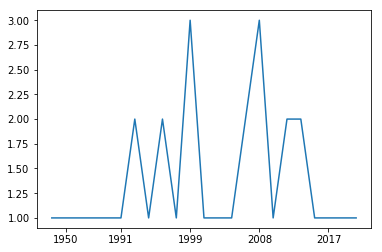

In [66]:
plt.plot(s_year3.index, s_year3.values)
plt.xticks( [1,5,10,15,20],['1950','1991','1999','2008','2017'])

In [69]:
# year = df['year']  
# rating = df['rating'] 
# plt.scatter(year, rating)

In [ ]:
# type(df['year'].value_counts())